# Desafío Empresarial: Análisis de Cohortes para los Pagos de Ironhack (Proyecto 1)

In [98]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 1. Análisis Exploratorio de Datos (EDA)

Funciones útiles para el EDA:

1\. **Vista Previa de Datos:** head(), tail() y sample()

2\. **Visión General de Datos:** info() y describe()

3\. **Valores Únicos:** unique() o value_counts()

4\. **Ordenamiento:** sort_values()

5\. **Subconjunto de Datos:** Usa corchetes ([]) para extraer columnas o filas basadas en condiciones.

### 1.1. Carga inicial de datos

In [2]:
cash_orig = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')

In [3]:
fees_orig = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [4]:
# Pandas cheat sheet

# Mostrar dataset
#cash
#fees

# Check first rows
#cash.head()
#fees.head()

# Sample of random rows
#cash.sample(10)
#cash.sample(frac=0.2)

# Shape of the DataFrame (rows, columns)
#print(f"Shape of the DataFrame: {fees.shape}")

# Column names
#print(f"Column Names: {fees.columns}")

# Data types of each column
#print(f"Data Types:\n{fees.dtypes}")

# General Information about the DataFrame
#data_info = cash.info()
#data_info = fees.info()

# Statistical Summary
#data_summary = cash.describe()
#print("\nStatistical Summary:")
#print(data_summary)

# Check for missing values in the DataFrame
#missing_values = fees.isnull(df)
#fees.isnull().sum()

In [5]:
# Column names
print(f"Column Names: {cash_orig.columns}")
print(f"Column Names: {fees_orig.columns}")

Column Names: Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')
Column Names: Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


In [6]:
fees = fees_orig.copy()
cash = cash_orig.copy()

In [7]:
cash = cash.drop(['updated_at','moderated_at','cash_request_received_date','money_back_date','transfer_type','send_at','recovery_status','reco_creation','reco_last_update'], axis=1)

In [8]:
# Comprobar eliminación de columnas
cash.sample()

,id,amount,status,created_at,user_id,deleted_account_id,reimbursement_date
13911,11574,100.0,money_back,2020-08-09 16:52:26.330964+00,29967.0,NaN,2020-08-19 16:53:09.981+00


In [9]:
fees = fees.drop(['category','reason','paid_at','from_date','to_date','charge_moment'], axis=1)

In [10]:
# Comprobar eliminación de columnas
fees.head()

,id,cash_request_id,type,status,total_amount,created_at,updated_at
0,6537,14941.0,instant_payment,rejected,5.0,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00
1,6961,11714.0,incident,accepted,5.0,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00
2,16296,23371.0,instant_payment,accepted,5.0,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00
3,20775,26772.0,instant_payment,accepted,5.0,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00
4,11242,19350.0,instant_payment,accepted,5.0,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00


In [11]:
# Limpiar fechas cash['created_at']
print(cash['created_at'].dtypes)
cash['created_at'] = pd.to_datetime(cash['created_at'])
print(cash['created_at'].dtypes)

object
datetime64[ns, UTC]


In [12]:
# # Limpiar fechas cash['reimbursement_date']

print(type(cash['reimbursement_date'][0]),'\t',cash['reimbursement_date'][0])
print(type(cash['reimbursement_date'][4]),'\t',cash['reimbursement_date'][4])

def corregir_formato(fecha):
    # Si no tiene microsegundos, agregar '.000000' antes de la zona horaria
    if '.' not in fecha.split('+')[0]:
        return fecha.replace('+', '.000000+')
    return fecha
    
cash['reimbursement_date'] = cash['reimbursement_date'].apply(corregir_formato)
cash['reimbursement_date'] = pd.to_datetime(cash['reimbursement_date'])
cash['reimbursement_date'] = cash['reimbursement_date'].dt.date

<class 'str'> 	 2020-01-09 19:05:21.596363+00
<class 'str'> 	 2020-06-05 22:00:00+00


In [13]:
# Limpiar fechas fees['created_at']
fees['created_at'] = pd.to_datetime(fees['created_at'])
fees['created_at'] = fees['created_at'].dt.date

In [14]:
# Limpiar fechas fees['updated_at']
fees['updated_at'] = pd.to_datetime(fees['updated_at'])
fees['updated_at'] = fees['updated_at'].dt.date

In [15]:
#print(cash.shape[0])
#print(len(cash['user_id'].value_counts()))
#print(len(cash['user_id'].unique()))
#print(cash['user_id'].isnull().sum())
#cash.info()
#user_id_cash['user_id'].isnull()
# Check for missing values in the DataFrame
#missing_values = pd.isnull(cash)
#missing_values.sample(frac=0.1)
#display(missing_values)

In [16]:
# Seleccionar una columnna (Series)
s = cash['user_id']
print(type(s))

<class 'pandas.core.series.Series'>


In [17]:
# Seleccionar columna como dataframe (DataFrame)
df = cash[['user_id','deleted_account_id']]
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [18]:
# Filtrar dataframe
df[df['user_id'].isna()]
#df[df['user_id'].isna()].sample(frac=0.1)
#The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
df[df['user_id'].isna() & df['deleted_account_id'].isna()]

,user_id,deleted_account_id


In [19]:
# Nueva columna id_usuario a partir de user_id + deleted_account_id
cash['id_usuario'] = cash['user_id'].fillna(cash['deleted_account_id'])

In [20]:
cash.sample(10)

,id,amount,status,created_at,user_id,deleted_account_id,reimbursement_date,id_usuario
18298,19778,100.0,money_back,2020-10-08 06:42:51.218108+00:00,40430.0,NaN,2020-11-03,40430.0
5520,451,100.0,money_back,2020-01-15 16:58:10.380366+00:00,NaN,4217.0,2020-02-06,4217.0
11861,15558,100.0,money_back,2020-09-10 14:32:28.509598+00:00,31216.0,NaN,2020-10-02,31216.0
7548,6565,100.0,rejected,2020-07-04 10:59:17.666133+00:00,NaN,19881.0,2020-08-09,19881.0
19122,20781,50.0,money_back,2020-10-13 08:26:41.191882+00:00,44801.0,NaN,2020-10-26,44801.0
17884,19358,50.0,money_back,2020-10-06 04:56:51.537475+00:00,8903.0,NaN,2020-11-05,8903.0
7682,18847,50.0,rejected,2020-10-02 09:12:04.649097+00:00,30350.0,NaN,2020-10-23,30350.0
7100,731,100.0,money_back,2020-02-25 08:05:06.501121+00:00,2539.0,NaN,2020-03-01,2539.0
2460,5679,100.0,rejected,2020-06-28 12:56:21.045966+00:00,NaN,2824.0,2020-07-07,2824.0
7357,17555,100.0,rejected,2020-09-23 23:24:11.480816+00:00,47347.0,NaN,2020-10-31,47347.0


In [21]:
# Convertir a integer los campos 'id'
print(type(cash['id_usuario'][0]))
cash['id_usuario'] = cash['id_usuario'].astype(int)
print(type(cash['id_usuario'][0]))

<class 'numpy.float64'>
<class 'numpy.int64'>


In [22]:
# Averiguar filas con Null en cash_request_id
fees.info()
fees[fees['cash_request_id'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   total_amount     21061 non-null  float64
 5   created_at       21061 non-null  object 
 6   updated_at       21061 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


,id,cash_request_id,type,status,total_amount,created_at,updated_at
1911,2990,NaN,instant_payment,cancelled,5.0,2020-08-06,2020-11-04
1960,3124,NaN,instant_payment,cancelled,5.0,2020-08-08,2020-11-04
4605,5185,NaN,instant_payment,cancelled,5.0,2020-08-26,2020-11-04
11870,3590,NaN,instant_payment,cancelled,5.0,2020-08-12,2020-11-04


In [23]:
# cash_request_id ya no tiene NaN!!!
fees.info()
fees[fees['cash_request_id'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   total_amount     21061 non-null  float64
 5   created_at       21061 non-null  object 
 6   updated_at       21061 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


,id,cash_request_id,type,status,total_amount,created_at,updated_at
1911,2990,NaN,instant_payment,cancelled,5.0,2020-08-06,2020-11-04
1960,3124,NaN,instant_payment,cancelled,5.0,2020-08-08,2020-11-04
4605,5185,NaN,instant_payment,cancelled,5.0,2020-08-26,2020-11-04
11870,3590,NaN,instant_payment,cancelled,5.0,2020-08-12,2020-11-04


### 1.? Cambio de cabecera 'id' <-> 'cash_request_id'

# TO-DO: Justificar cambio de cabeceras

In [24]:
# Previo al cambio de cabeceras
fees.head()

,id,cash_request_id,type,status,total_amount,created_at,updated_at
0,6537,14941.0,instant_payment,rejected,5.0,2020-09-07,2020-10-13
1,6961,11714.0,incident,accepted,5.0,2020-09-09,2020-10-13
2,16296,23371.0,instant_payment,accepted,5.0,2020-10-23,2020-10-23
3,20775,26772.0,instant_payment,accepted,5.0,2020-10-31,2020-10-31
4,11242,19350.0,instant_payment,accepted,5.0,2020-10-06,2020-10-13


In [25]:
# Intercambiar nombre de las columnas 'id' y 'cash_request_id' en la tabla fees
fees = fees.rename(columns={'id': 'cash_request_id', 'cash_request_id': 'id'})

In [26]:
# Después del cambio de cabeceras
fees.head()

,cash_request_id,id,type,status,total_amount,created_at,updated_at
0,6537,14941.0,instant_payment,rejected,5.0,2020-09-07,2020-10-13
1,6961,11714.0,incident,accepted,5.0,2020-09-09,2020-10-13
2,16296,23371.0,instant_payment,accepted,5.0,2020-10-23,2020-10-23
3,20775,26772.0,instant_payment,accepted,5.0,2020-10-31,2020-10-31
4,11242,19350.0,instant_payment,accepted,5.0,2020-10-06,2020-10-13


### 1.? Obtener cohortes

In [27]:
#cash.sample(5)
#cash[cash['cash_request_id'].isna()]
#grouped1st = cash[['id_usuario', 'created_at']].groupby('id_usuario').min().reset_index()
#grouped1st['cohorte'] = grouped1st['created_at'].to_period('M')
#print(grouped1st)

#grouped1st = cash[['id_usuario', 'created_at']].groupby('id_usuario').min().reset_index()
grouped1st = cash.pivot_table(
    values = "created_at",
    index = "id_usuario",
    aggfunc = "min"
)
grouped1st['cohorte'] = grouped1st['created_at'].dt.to_period('M')
#grouped1st.sample(10)

#cash.sample(3)
# for name, group in min_fecha:
#     print(f"Grupo: {name}")
#     print(group)
#     print()

# # Podriamos crear una columna extra, añadiencdo df_tips['zscore'] = df_tips.groupby('sex')['tip'].transform(zscore)
# zscore = lambda x: (x - x.mean()) / x.std()
# df_tips.groupby('sex')['tip'].transform(zscore)
#cash[cash['id_usuario'] == min_fecha['id_usuario']]['cohorte'] = min_fecha[min_fecha['id_usuario'] == cash['id_usuario']].created_at.to_period('M')
#cash['cohorte'] = cash['id_usuario'].copy()
# print(min_fecha)



/var/folders/3h/d4zpwm_x4qg78bc5337r4q240000gq/T/ipykernel_27776/1781315634.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped1st['cohorte'] = grouped1st['created_at'].dt.to_period('M')


In [49]:
cash.shape

(23970, 8)

In [52]:
# 11793 usuarios distintos
cash[['id_usuario']].value_counts()

id_usuario
2142          21
6334          19
3377          19
13851         18
2530          17
              ..
44488          1
44484          1
44445          1
44436          1
103719         1
Name: count, Length: 11793, dtype: int64

In [50]:
grouped1st.shape

(11793, 2)

In [53]:
# Suma de todos los usuarios en todas las cohortes
grouped1st.value_counts().sum()

11793

In [30]:
cash_cohorts = pd.merge(cash, grouped1st[['cohorte']], on='id_usuario')
cash_cohorts.head()


,id,amount,status,created_at,user_id,deleted_account_id,reimbursement_date,id_usuario,cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,804.0,NaN,2020-01-09,804,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,231.0,NaN,2020-01-09,231,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,191.0,NaN,2020-01-09,191,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,761.0,NaN,2020-01-09,761,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,7686.0,NaN,2020-06-05,7686,2020-05


In [33]:
print(cash.shape)
print(cash_cohorts.shape)

(23970, 8)
(23970, 9)


In [126]:
cash_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  23970 non-null  int64              
 1   amount              23970 non-null  float64            
 2   status              23970 non-null  object             
 3   created_at_x        23970 non-null  datetime64[ns, UTC]
 4   user_id             21867 non-null  float64            
 5   deleted_account_id  2104 non-null   float64            
 6   reimbursement_date  23970 non-null  object             
 7   id_usuario          23970 non-null  int64              
 8   created_at_y        23970 non-null  datetime64[ns, UTC]
 9   cohorte             23970 non-null  period[M]          
dtypes: datetime64[ns, UTC](2), float64(3), int64(2), object(2), period[M](1)
memory usage: 1.8+ MB


In [69]:
#grouped_temp = cash_cohorts.groupby('id_usuario')['cohorte'].transform(lambda x : str(x))
#print(grouped_temp.sum())
#cash_cohorts.groupby('cohorte')['id_usuario'].count().reset_index(name='requests')
    #cash_cohorts['cohort_month'] = cash_cohorts.groupby('id_usuario')['created_at'].transform('min').dt.to_period('M')
#cash_cohorts = cash_cohorts.drop(['cohorte_str'], axis=1)
    #cash_cohorts[['cash_request_id','id_usuario','cohorte','cohort_month']].sample(20)

cash_cohorts['cohorte'] = cash_cohorts['cohorte'].astype(str)
cash_cohorts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   cash_request_id     23970 non-null  int64              
 1   amount              23970 non-null  float64            
 2   status              23970 non-null  object             
 3   created_at          23970 non-null  datetime64[ns, UTC]
 4   user_id             21867 non-null  float64            
 5   deleted_account_id  2104 non-null   float64            
 6   reimbursement_date  23970 non-null  object             
 7   id_usuario          23970 non-null  int64              
 8   cohorte             23970 non-null  object             
 9   cohort_month        23970 non-null  period[M]          
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(3), period[M](1)
memory usage: 1.8+ MB


In [96]:
# Número de usuarios por cohorte
users_by_cohort = cash_cohorts.groupby('cohorte')['id_usuario'].nunique().reset_index()
users_by_cohort.columns = ['cohorte','num_usuarios']
print(users_by_cohort)

    cohorte  num_usuarios
0   2019-11             1
1   2019-12           254
2   2020-01           106
3   2020-02            90
4   2020-03            86
5   2020-04           246
6   2020-05           432
7   2020-06          1540
8   2020-07          1482
9   2020-08           728
10  2020-09          1950
11  2020-10          4802
12  2020-11            76


In [129]:
users_by_cohort.set_index('cohorte', inplace=True)
print(users_by_cohort.index)

Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohorte')


<Figure size 1000x600 with 0 Axes>

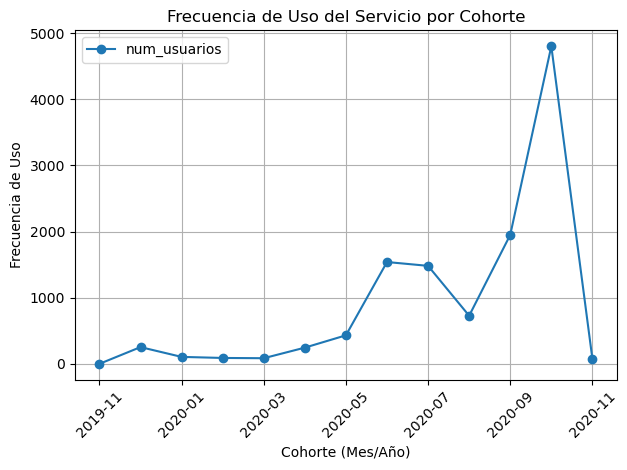

In [130]:
# Crear un gráfico de líneas para visualizar la frecuencia de uso por cohorte
plt.figure(figsize=(10, 6))
users_by_cohort.plot(kind='line', marker='o')
plt.title('Frecuencia de Uso del Servicio por Cohorte')
plt.xlabel('Cohorte (Mes/Año)')
plt.ylabel('Frecuencia de Uso')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
# Frecuencia de uso del servicio por cohorte
transactions_by_cohort = cash_cohorts.groupby('cohorte')['cash_request_id'].nunique().reset_index()
transactions_by_cohort.columns = ['cohorte','num_transactions']
print(transactions_by_cohort)

    cohorte  num_transactions
0   2019-11                 8
1   2019-12              1080
2   2020-01               354
3   2020-02               441
4   2020-03               371
5   2020-04               952
6   2020-05              1660
7   2020-06              5266
8   2020-07              4147
9   2020-08              1632
10  2020-09              2925
11  2020-10              5058
12  2020-11                76


In [123]:
transactions_by_cohort.set_index('cohorte', inplace=True)
print(transactions_by_cohort.index)

Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohorte')


In [124]:
transactions_by_cohort

,num_transactions
cohorte,
2019-11,8
2019-12,1080
2020-01,354
2020-02,441
2020-03,371
2020-04,952
2020-05,1660
2020-06,5266
2020-07,4147


<Figure size 1000x600 with 0 Axes>

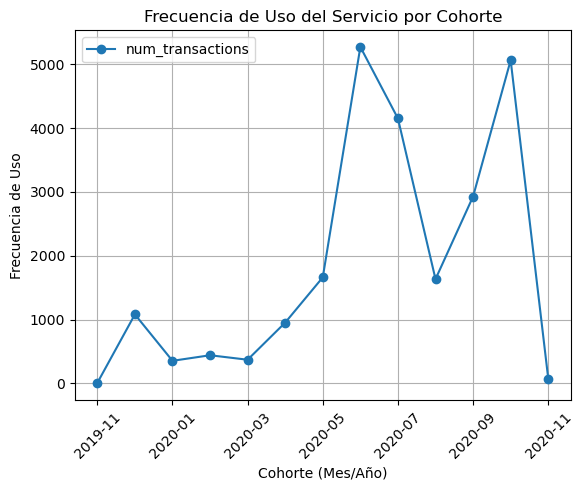

In [128]:
# Crear un gráfico de líneas para visualizar la frecuencia de uso por cohorte
plt.figure(figsize=(10, 6))
transactions_by_cohort.plot(kind='line', marker='o')
plt.title('Frecuencia de Uso del Servicio por Cohorte')
plt.xlabel('Cohorte (Mes/Año)')
plt.ylabel('Frecuencia de Uso')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [131]:
cash_cohorts['created_at_month'] = cash_cohorts['created_at'].dt.to_period('M')
subset = ['cash_request_id','created_at_month','cohorte','id_usuario']
cash_cohorts[subset]

/var/folders/3h/d4zpwm_x4qg78bc5337r4q240000gq/T/ipykernel_27776/1513153265.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_cohorts['created_at_month'] = cash_cohorts['created_at'].dt.to_period('M')


,cash_request_id,created_at_month,cohorte,id_usuario
0,5,2019-12,2019-12,804
1,70,2019-12,2019-12,231
2,7,2019-12,2019-12,191
3,10,2019-12,2019-12,761
4,1594,2020-05,2020-05,7686
...,...,...,...,...
23965,20616,2020-10,2020-06,13681
23966,25243,2020-10,2020-10,30367
23967,22357,2020-10,2020-10,82122
23968,20256,2020-10,2020-10,64517


In [148]:
# Frecuencia de uso del servicio por cohorte
frequency_by_cohort = cash_cohorts[subset].groupby(['created_at_month','cohorte'])['cash_request_id'].count().reset_index()
frequency_by_cohort.set_index('created_at_month', inplace=True)
frequency_by_cohort.columns = ['cohorte','num_transactions']
print(frequency_by_cohort)

                  cohorte  num_transactions
created_at_month                           
2019-11           2019-11                 1
2019-12           2019-11                 1
2019-12           2019-12               288
2020-01           2019-12               106
2020-01           2020-01               117
...                   ...               ...
2020-11           2020-07                 7
2020-11           2020-08                10
2020-11           2020-09                20
2020-11           2020-10                15
2020-11           2020-11                76

[83 rows x 2 columns]


In [150]:
# Comprobación
frequency_by_cohort['num_transactions'].sum()

23970

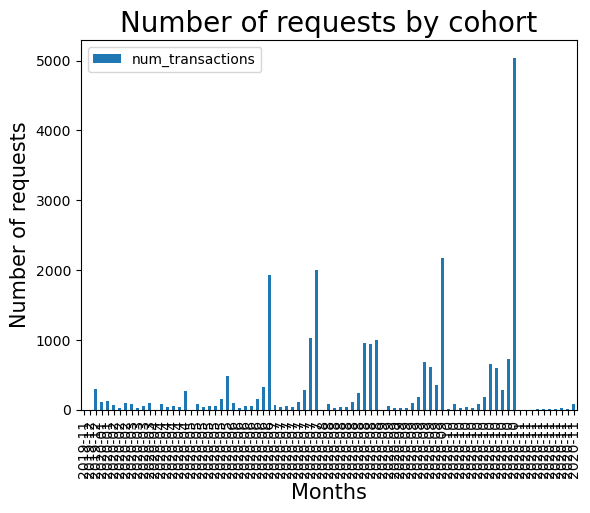

In [151]:
# Crear gráfico!!!
frequency_by_cohort.plot(kind="bar")
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of requests", fontsize=15)
plt.title("Number of requests by cohort", fontsize=20)
plt.show()

# Unir tablas cash y fees

In [35]:
cash_cohorts.shape

(23970, 9)

In [36]:
fees.shape

(21061, 7)

In [38]:
# Renombrar cash_cohorts['id'] como cash_cohorts['cash_request_id'] para poder hacer el merge con fees
cash_cohorts = cash_cohorts.rename(columns={'id': 'cash_request_id'})

In [ ]:
all = pd.merge(cash_cohorts, fees, on='cash_request_id')
all.head()


,cash_request_id,amount,status_x,created_at_x,user_id,deleted_account_id,reimbursement_date,id_usuario,created_at_y,cohorte,id,type,status_y,total_amount,created_at,updated_at
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,804.0,NaN,2020-01-09,804,2019-12-10 19:05:21.596873+00:00,2019-12,2568.0,postpone,accepted,5.0,2020-06-09,2020-10-13
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,231.0,NaN,2020-01-09,231,2019-12-10 19:50:12.347780+00:00,2019-12,1796.0,postpone,cancelled,5.0,2020-06-23,2020-10-13
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,191.0,NaN,2020-01-09,191,2019-12-10 19:13:35.825460+00:00,2019-12,1518.0,postpone,cancelled,5.0,2020-06-23,2020-10-13
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,761.0,NaN,2020-01-09,761,2019-12-10 19:16:10.880172+00:00,2019-12,2278.0,postpone,accepted,5.0,2020-05-30,2020-10-13
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,7686.0,NaN,2020-06-05,7686,2020-05-06 09:59:38.877376+00:00,2020-05,4065.0,incident,accepted,5.0,2020-07-18,2020-10-13


In [149]:
all.groupby('cohorte')['id_usuario'].count().reset_index(name='requests')
all[all['cohorte'] == '2019-11']

,cash_request_id,amount,status_x,created_at_x,user_id,deleted_account_id,reimbursement_date,id_usuario,created_at_y,cohorte,id,type,status_y,total_amount,created_at,updated_at
32,118,100.0,rejected,2019-12-12 14:14:14.131479+00:00,47.0,NaN,2019-12-19,47,2019-11-19 13:57:53.511561+00:00,2019-11,2362.0,postpone,accepted,5.0,2020-06-04,2020-10-13
403,1218,100.0,money_back,2020-04-16 08:42:15.429083+00:00,47.0,NaN,2020-04-30,47,2019-11-19 13:57:53.511561+00:00,2019-11,4047.0,incident,rejected,5.0,2020-07-08,2020-10-13
993,10942,10.0,money_back,2020-08-05 09:34:16.818322+00:00,47.0,NaN,2020-09-29,47,2019-11-19 13:57:53.511561+00:00,2019-11,18732.0,postpone,accepted,5.0,2020-10-05,2020-10-13
2580,1832,10.0,money_back,2020-05-15 16:04:10.449840+00:00,47.0,NaN,2020-09-17,47,2019-11-19 13:57:53.511561+00:00,2019-11,3555.0,postpone,cancelled,5.0,2020-07-23,2020-10-13
7696,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,47.0,NaN,2019-12-05,47,2019-11-19 13:57:53.511561+00:00,2019-11,2069.0,postpone,accepted,5.0,2020-06-23,2020-10-13
15377,17314,5.0,money_back,2020-09-22 16:03:24.612340+00:00,47.0,NaN,2020-10-16,47,2019-11-19 13:57:53.511561+00:00,2019-11,24266.0,instant_payment,accepted,5.0,2020-10-25,2020-10-25
17036,21042,5.0,money_back,2020-10-14 10:56:52.227355+00:00,47.0,NaN,2020-11-06,47,2019-11-19 13:57:53.511561+00:00,2019-11,26934.0,instant_payment,accepted,5.0,2020-11-01,2020-11-01


In [144]:
cash_cohorts.groupby('cohorte')['cash_request_id'].count().reset_index(name='requests')

,cohorte,requests
0,2019-11,8
1,2019-12,1080
2,2020-01,354
3,2020-02,441
4,2020-03,371
5,2020-04,952
6,2020-05,1660
7,2020-06,5266
8,2020-07,4147
9,2020-08,1632


### 1.?  Frecuencia de uso del servicio

In [142]:
#frecuencia_uso = cash_cohorts.groupby(['cohorte'])['id_usuario'].count().reset_index(name='frecuencia')
frecuencia_uso = cash_cohorts.groupby(['cohorte','id_usuario'])['created_at_x'].count().reset_index(name='frecuencia')
frecuencia_uso = frecuencia_uso.groupby('cohorte')['frecuencia'].sum()
frecuencia_uso.head()

cohorte
2019-11       8
2019-12    1080
2020-01     354
2020-02     441
2020-03     371
Freq: M, Name: frecuencia, dtype: int64

In [131]:
frecuencia_uso

,cohorte,frecuencia
0,2019-11,8
1,2019-12,1080
2,2020-01,354
3,2020-02,441
4,2020-03,371
5,2020-04,952
6,2020-05,1660
7,2020-06,5266
8,2020-07,4147
9,2020-08,1632


In [ ]:
# Averiguar filas con Null en cash_request_id
fees.info()
fees[fees['cash_request_id'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   total_amount     21061 non-null  float64
 5   created_at       21061 non-null  object 
 6   updated_at       21061 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


,id,cash_request_id,type,status,total_amount,created_at,updated_at
1911,2990,NaN,instant_payment,cancelled,5.0,2020-08-06,2020-11-04
1960,3124,NaN,instant_payment,cancelled,5.0,2020-08-08,2020-11-04
4605,5185,NaN,instant_payment,cancelled,5.0,2020-08-26,2020-11-04
11870,3590,NaN,instant_payment,cancelled,5.0,2020-08-12,2020-11-04


In [47]:
fees.sample(5)

,cash_request_id,id,type,status,total_amount,created_at,updated_at
9340,2355,9385.0,postpone,accepted,5.0,2020-07-30,2020-10-13
2851,9821,10177.0,postpone,accepted,5.0,2020-09-29,2020-10-13
7383,16835,20005.0,postpone,cancelled,5.0,2020-10-24,2020-10-24
7956,14410,21865.0,instant_payment,accepted,5.0,2020-10-17,2020-10-17
19918,13886,21454.0,instant_payment,accepted,5.0,2020-10-16,2020-10-16


In [76]:
# Cambiar tipo de datos de columna fees.id???
# fees_ok['id'] = fees_ok['id'].astype(int)
# cash['user_id'] = cash['user_id'].astype(int)
# cash['deleted_account_id'] = cash['deleted_account_id'].astype(int)
# cash.info()

# CONCLUSION: IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

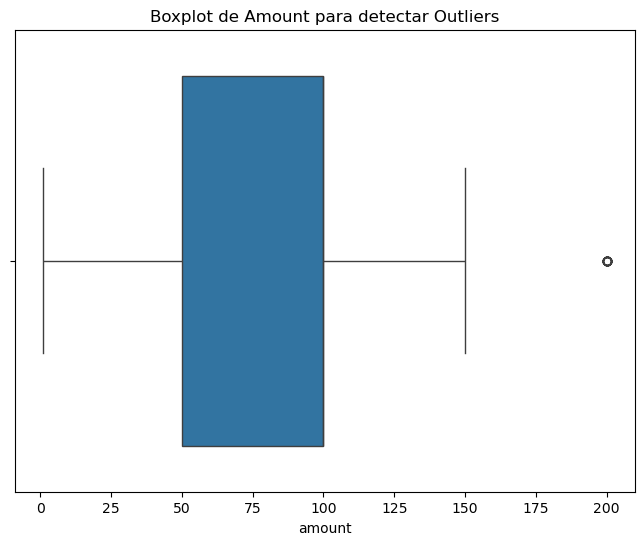

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para la columna 'amount', por ejemplo:
Q1 = cash['amount'].quantile(0.25)
Q3 = cash['amount'].quantile(0.75)
IQR = Q3 - Q1
# Definir el rango para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtrar los datos sin outliers
filtered_cash = cash[(cash['amount'] >= lower_bound) & (cash['amount'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=cash['amount'])
plt.title('Boxplot de Amount para detectar Outliers')
plt.show()